In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline

In [2]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

def parse_mdtest(files):
    r = []
    for fname in sorted(files):
        with open(fname) as f:
            data = json.load(f)
            for line in data['stdout_lines']:
                if "started" in line: start = line.split()[4]
                if "finished" in line: end = line.split()[4]
            r.append(to_seconds(end) - to_seconds(start))
    return r

,interfere,isolated
0,360.0,191.0
1,522.0,320.0
2,985.0,689.0
3,1412.0,1099.0


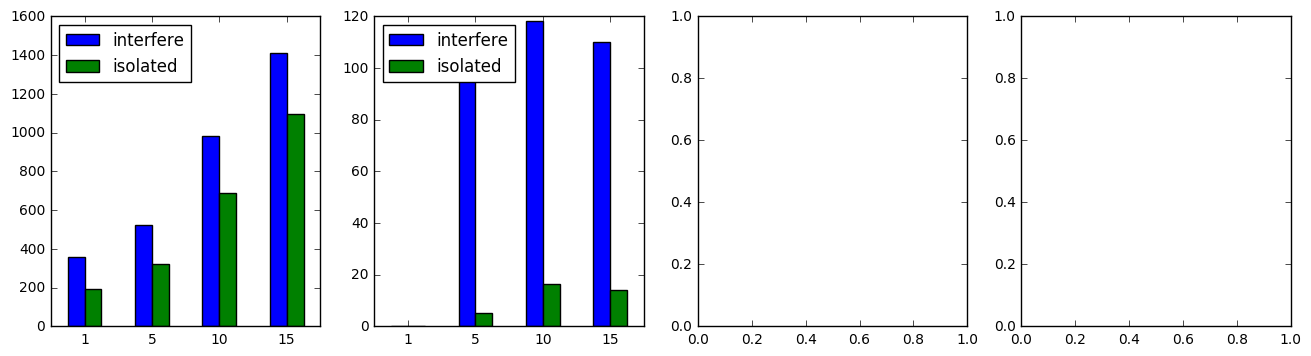

In [12]:
norm = np.mean(parse_mdtest(glob.glob("../results-cloudlab-clients1/*isolated*")))

mean = pd.DataFrame(columns=["interfere", "isolated"])
stds = pd.DataFrame(columns=["interfere", "isolated"])
clients = [1, 5, 10, 15]
for i in clients:
    j0 = parse_mdtest(glob.glob("../results-cloudlab-clients" + str(i) + "/*interfere*"))
    j1 = parse_mdtest(glob.glob("../results-cloudlab-clients" + str(i) + "/*isolated*"))    
    #df.loc[len(df)] = [str(i), np.mean(d/norm), np.std(d/norm)]
    mean.loc[len(mean)] = [np.m(j0), np.max(j1)]
    stds.loc[len(stds)] = [np.std(j0), np.std(j1)]    
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
mean.plot.bar(ax=ax[0])
x = ax[0].set_xticklabels(clients, rotation=0)
stds.plot.bar(ax=ax[1])
x = ax[1].set_xticklabels(clients, rotation=0)
mean